In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [42]:
sz = np.load('shenzhen/matrix.npy')
sz.shape
pems = np.load('pems-bay/matrix.npy')
pems.shape
np.unique(pems)

array([0.        , 0.10002012, 0.10002849, ..., 0.99999607, 0.99999917,
       1.        ], dtype=float32)

325
2369


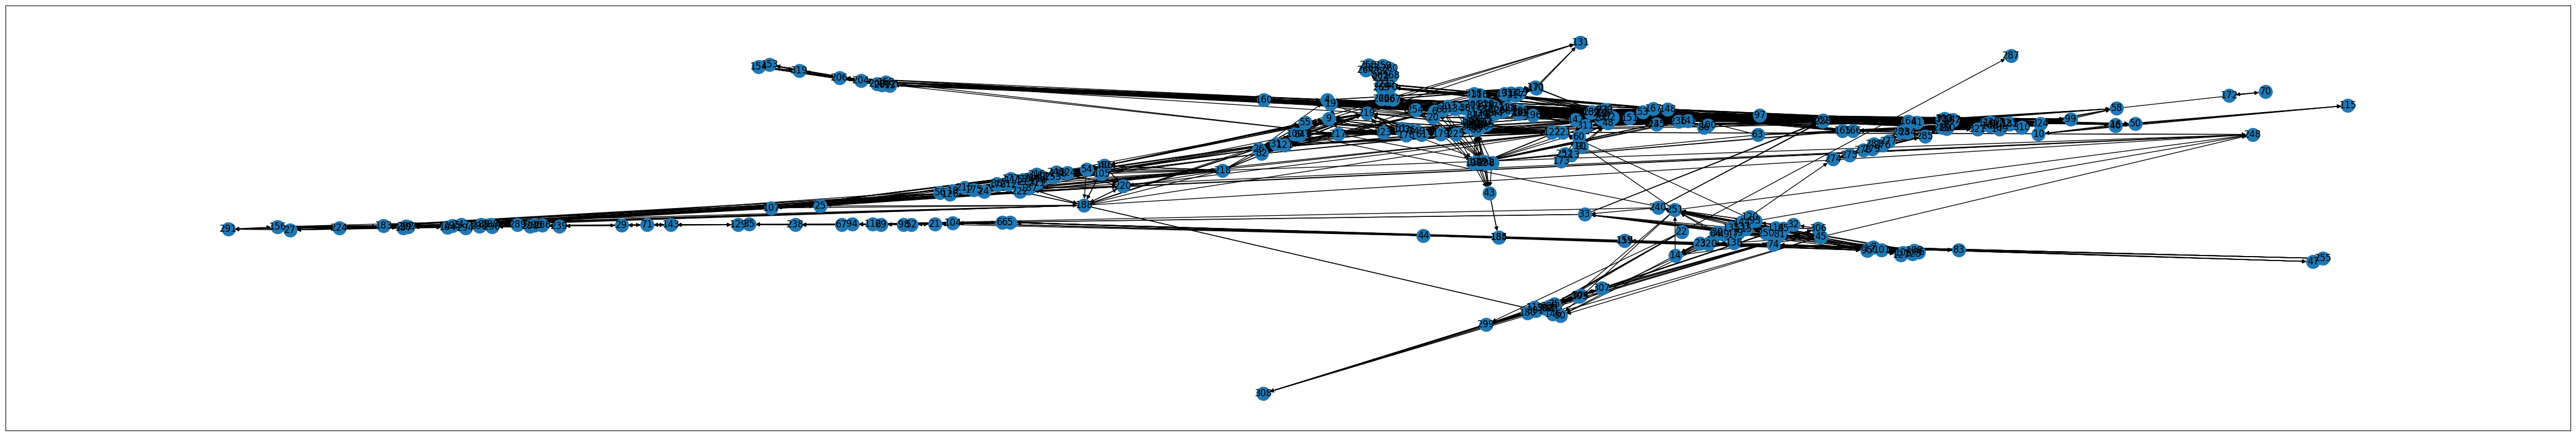

In [45]:
G = nx.DiGraph()
Matrix = pems
print(len(Matrix))
plt.figure(figsize=(60, 10))
V=0
for i in range(len(Matrix)):
	for j in range(len(Matrix)):
		if i==j:
			continue
		if Matrix[i][j]>0:
			G.add_edge(i, j)
			V+=1
print(V)
nx.draw_networkx(G,pos=nx.spring_layout(G))
plt.show()

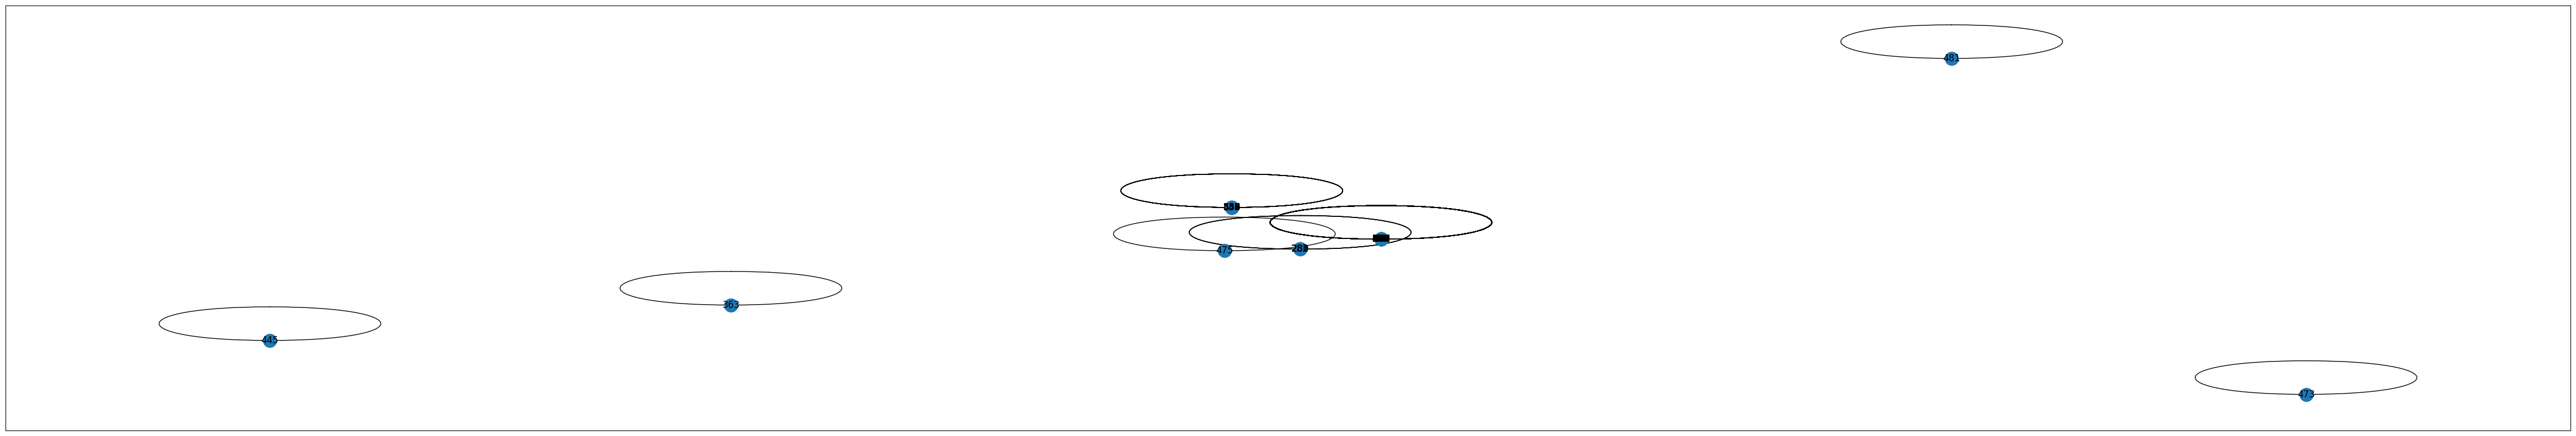

In [31]:
g = nx.from_numpy_array(sz)
plt.figure(figsize=(60, 10))
nx.draw_networkx(g,pos=nx.spectral_layout(g))
plt.show()

In [43]:
# Python program to find strongly connected components in a given
# directed graph using Tarjan's algorithm (single DFS)
#Complexity : O(V+E)

from collections import defaultdict

# This class represents an directed graph
# using adjacency list representation


class Graph:

    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices

        # default dictionary to store graph
        self.graph = defaultdict(list)

        self.Time = 0

    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)

    '''A recursive function that find finds and prints strongly connected
    components using DFS traversal
    u --> The vertex to be visited next
    disc[] --> Stores discovery times of visited vertices
    low[] -- >> earliest visited vertex (the vertex with minimum
                discovery time) that can be reached from subtree
                rooted with current vertex
     st -- >> To store all the connected ancestors (could be part
           of SCC)
     stackMember[] --> bit/index array for faster check whether
                  a node is in stack
    '''

    def SCCUtil(self, u, low, disc, stackMember, st):

        # Initialize discovery time and low value
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1
        stackMember[u] = True
        st.append(u)

        # Go through all vertices adjacent to this
        for v in self.graph[u]:

            # If v is not visited yet, then recur for it
            if disc[v] == -1:

                self.SCCUtil(v, low, disc, stackMember, st)

                # Check if the subtree rooted with v has a connection to
                # one of the ancestors of u
                # Case 1 (per above discussion on Disc and Low value)
                low[u] = min(low[u], low[v])

            elif stackMember[v] == True:

                '''Update low value of 'u' only if 'v' is still in stack
                (i.e. it's a back edge, not cross edge).
                Case 2 (per above discussion on Disc and Low value) '''
                low[u] = min(low[u], disc[v])

        # head node found, pop the stack and print an SCC
        w = -1  # To store stack extracted vertices
        if low[u] == disc[u]:
            while w != u:
                w = st.pop()
                print(w, end=" ")
                stackMember[w] = False

            print()

    # The function to do DFS traversal.
    # It uses recursive SCCUtil()

    def SCC(self):

        # Mark all the vertices as not visited
        # and Initialize parent and visited,
        # and ap(articulation point) arrays
        disc = [-1] * (self.V)
        low = [-1] * (self.V)
        stackMember = [False] * (self.V)
        st = []

        # Call the recursive helper function
        # to find articulation points
        # in DFS tree rooted with vertex 'i'
        for i in range(self.V):
            if disc[i] == -1:
                self.SCCUtil(i, low, disc, stackMember, st)

In [47]:
g1 = Graph(2369)
for i in range(len(Matrix)):
	for j in range(len(Matrix)):
		if i==j:
			continue
		if Matrix[i][j]>0:
			g1.addEdge(i, j)
print("SSC in first graph ")
g1.SCC()

SSC in first graph 
0 
1 
172 70 
58 
149 99 
115 
10 
46 
50 
16 
319 154 153 
209 207 206 204 202 13 
158 
131 
156 
291 
27 
288 
297 294 293 292 289 194 
295 
296 290 286 
298 
239 143 129 71 29 
35 
238 
94 
67 
112 69 
98 52 21 
104 66 
5 
255 47 
159 95 155 83 74 12 
185 184 
310 
268 264 260 259 258 
261 
263 262 
273 272 271 270 269 
265 
267 266 
312 236 235 234 233 196 182 232 231 229 169 230 166 165 150 148 322 323 321 181 168 130 110 167 145 324 257 142 141 244 243 125 317 318 316 315 314 203 190 254 201 313 227 226 151 134 205 171 170 193 78 37 136 88 43 8 191 72 160 20 128 237 164 102 97 41 19 4 2 
116 87 
3 
6 
7 
68 
34 
62 
127 108 106 101 96 
123 
228 
33 
240 
81 
144 114 15 85 32 
306 
308 
307 304 
305 303 302 195 300 
146 80 
224 183 157 
189 
248 
247 
214 213 211 174 137 253 216 124 246 54 218 222 221 220 219 109 188 186 217 121 55 40 105 132 177 212 215 126 56 82 31 84 187 107 25 36 118 90 57 111 176 175 24 18 26 9 
311 
147 
60 48 
252 173 113 91 11 
251 93 
